In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set seaborn style for clean visuals
sns.set(style="whitegrid")

## Step 1: Load employee data
Load employee data from the provided source file:
 - WA_Fn-UseC_-HR-Employee-Attrition.csv

In [3]:
emp_data = pd.read_csv('../Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Step 2: Clean red wine data
We check for:

- Missing values

- Duplicates
    - Then we drop the duplicate rows (if there is any)

In [4]:
emp_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
emp_data.duplicated().sum()

np.int64(0)

In [6]:
emp_data.shape

(1470, 35)

## Step 3: Explore employee data
Let's see how much data we have, and preview some rows.

In [7]:
emp_data.shape

(1470, 35)

In [8]:
emp_data.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1247,31,No,Travel_Rarely,1003,Sales,5,3,Technical Degree,1,1749,...,3,80,1,6,3,3,5,2,0,2
206,22,No,Travel_Rarely,1136,Research & Development,5,3,Life Sciences,1,284,...,1,80,1,4,2,2,4,2,2,2
318,27,No,Travel_Rarely,1220,Research & Development,5,3,Life Sciences,1,434,...,2,80,0,4,2,2,4,3,1,2
800,28,Yes,Travel_Frequently,1009,Research & Development,1,3,Medical,1,1111,...,1,80,2,1,2,3,1,0,0,0
1436,21,No,Travel_Rarely,501,Sales,5,1,Medical,1,2021,...,4,80,0,2,6,3,2,2,1,2
449,39,No,Travel_Frequently,443,Research & Development,8,1,Life Sciences,1,602,...,1,80,1,8,3,3,8,3,0,7
1255,33,Yes,Travel_Rarely,211,Sales,16,3,Life Sciences,1,1758,...,3,80,0,11,2,2,0,0,0,0
811,38,No,Travel_Rarely,130,Sales,2,2,Marketing,1,1125,...,3,80,0,10,2,3,1,0,0,0
109,22,No,Travel_Rarely,534,Research & Development,15,3,Medical,1,144,...,3,80,0,1,5,3,0,0,0,0
282,29,No,Travel_Frequently,442,Sales,2,2,Life Sciences,1,388,...,1,80,0,10,3,2,10,7,0,9


In [9]:
emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
emp_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Select and prepare the features of an employee that are most relevant for solving the following tasks
We have selected the following features:

JobSatisfaction, WorkLifeBalance, YearsSinceLastPromotion, EnvironmentSatisfaction and MonthlyIncome

## 2. Supervised machine learning: linear regression
train, test, and validate a machine learning model for prediction of the income of a new employee



We want: 
- Age
- Education
- EducationField
- JobLevel
- JobRole
- TotalWorkingYears
- StockOptionLevel

In [25]:
# Vælg de ønskede features
features = [
    'Age',
    'Education',
    'EducationField',
    'JobLevel',
    'JobRole',
    'TotalWorkingYears',
    'StandardHours',
    'StockOptionLevel'
]

# Target (det vi vil forudsige)
target = 'MonthlyIncome'

# Lav en kopi af datasættet med kun relevante kolonner
df_model = emp_data[features + [target]].copy()

In [26]:
# We want to make EducationField and JobRole to numbers 

df_model_encoded = pd.get_dummies(df_model, columns=['EducationField', 'JobRole'], drop_first=True)

In [27]:
# Du  kolonner med værdierne 0 og 1, men pandas kan vise dem som False og True
df_model_encoded.sample(10)

,Age,Education,JobLevel,TotalWorkingYears,StandardHours,StockOptionLevel,MonthlyIncome,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
554,27,3,2,9,80,0,6811,False,False,True,False,False,False,False,False,False,False,False,False,False
695,37,4,3,17,80,0,10609,True,False,False,False,False,False,False,False,False,False,False,True,False
1466,39,1,3,9,80,1,9991,False,False,True,False,False,False,False,False,False,False,False,False,False
1248,27,3,1,6,80,0,3445,False,False,True,False,False,False,False,False,False,False,True,False,False
1129,42,2,5,24,80,0,19613,False,False,False,True,False,False,False,True,False,False,False,False,False
856,20,3,1,2,80,0,3033,True,False,False,False,False,False,True,False,False,False,False,False,False
143,30,3,1,5,80,0,2632,True,False,False,False,False,False,False,False,False,False,True,False,False
298,36,4,1,4,80,2,3688,True,False,False,False,False,False,True,False,False,False,False,False,False
587,52,4,2,9,80,1,3149,True,False,False,False,False,False,True,False,False,False,False,False,False
997,27,4,1,8,80,0,2394,True,False,False,False,False,False,False,False,False,False,True,False,False


Nu skal vi bruge vores test data, så vi kan træne en lineær regressionsmodel og Evaluere med R² og visualisering

Vi skal lave en regressionsmodel for at kunne forudsige MonthlyIncome ud fra vores valgte inputvariabler 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Efter at have importet alle nye værktøj skal vi spitte de uafhængige variabler , de afhængige variabel

- X : de uafhængige variabler (det vi bruger til at forudsige med)
- Y : den afhængige variabel (det du vil forudsige – "target")


In [ ]:
# Vi fjerner MonthlyIncome fra x kolonne og sætter den ind på y 
# fordi vi aldrig må bruge y som en del af input, for så ville modellen snyde og kende svart på forhånd
X = df_model_encoded.drop(columns=['MonthlyIncome'])
y = df_model_encoded['MonthlyIncome']


#test_size=0.3 betyder 30% testdata
#random_state=42 gør det reproducérbart

#Den deler jeres datasæt op i træningsdata og testdata, så I kan træne modellen på én del og teste den på en anden.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Vi har ny lavet vores teste dataset og skal nu til at lave LinearRegression

In [33]:
#Opretter en lineær regressionsmodel
model = LinearRegression()

# Lær hvordan datasettet hænger sammen
model.fit(X_train, y_train) 

# Her prøver vi at fordusige "MonthlyIncome" men vores model som lige har lært hvordan datasettet ser ud
# Her bruger vi vores X_test data for at teste og ikke vores trinings data. 
y_pred = model.predict(X_test)


Vi behøver ikke at print/ se resultatet ud af vores forudsigelse for at kunne evaluere  vores moddel. Men vi synes det kunne været sjovt at få det vist. 

In [34]:
# Vis de første 10 forudsigelser og deres faktiske værdi
for real, pred in list(zip(y_test, y_pred))[:10]:
    print(f"Faktisk løn: {real:.0f} kr.  →  Forudsagt løn: {pred:.0f} kr.")

Faktisk løn: 8463 kr.  →  Forudsagt løn: 5876 kr.
Faktisk løn: 4450 kr.  →  Forudsagt løn: 5786 kr.
Faktisk løn: 1555 kr.  →  Forudsagt løn: 2811 kr.
Faktisk løn: 9724 kr.  →  Forudsagt løn: 8949 kr.
Faktisk løn: 5914 kr.  →  Forudsagt løn: 5614 kr.
Faktisk løn: 2579 kr.  →  Forudsagt løn: 2480 kr.
Faktisk løn: 4230 kr.  →  Forudsagt løn: 2409 kr.
Faktisk løn: 2232 kr.  →  Forudsagt løn: 2508 kr.
Faktisk løn: 8865 kr.  →  Forudsagt løn: 9315 kr.
Faktisk løn: 2269 kr.  →  Forudsagt løn: 2232 kr.


Efter at have set de første 10 i datasettet, vil v gerne udregne hvor godt/ dårlig vores model er, ved at udregn R² og RMSE

In [35]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score: {r2:.3f}")
print(f"RMSE: {rmse:.2f} kr.")


R² score: 0.934
RMSE: 1153.72 kr.


## R² (R-squared)
Variationen i MonthlyIncome kan modellen forklare med værdier som ligger mellem 0 og 1.

- 1.0 = Perfekt model

- 0.0 = Modellen gætter lige så godt som at bruge gennemsnittet

- < 0 = Modellen er dårligere end at gætte tilfældigt

I vores tilfælde ligger vi på : R² score: 0.934, 

Det betyder, at modellen kan forklare **93,4 % af variationen i løn** baseret på de oplysninger, vi har givet den.

## RMSE (Root Mean Squared Error)

RMSE er et mål for, hvor meget modellen i gennemsnit gætter forkert, når den forsøger at forudsige `MonthlyIncome`.

- En lav RMSE betyder, at modellen generelt forudsiger løn ret præcist.
- En høj RMSE betyder, at modellen ofte rammer langt ved siden af.

I vores tilfælde er RMSE: **1.153,72 kr.**

Det betyder, at modellen i gennemsnit **gætter forkert med ca. 1.153 kr.** pr. medarbejder.


## Visualisere
Vi bruger et scatter plot, hvor:

- X-aksen viser faktisk løn (virkeligheden)
- Y-aksen viser forudsagt løn (modellen)

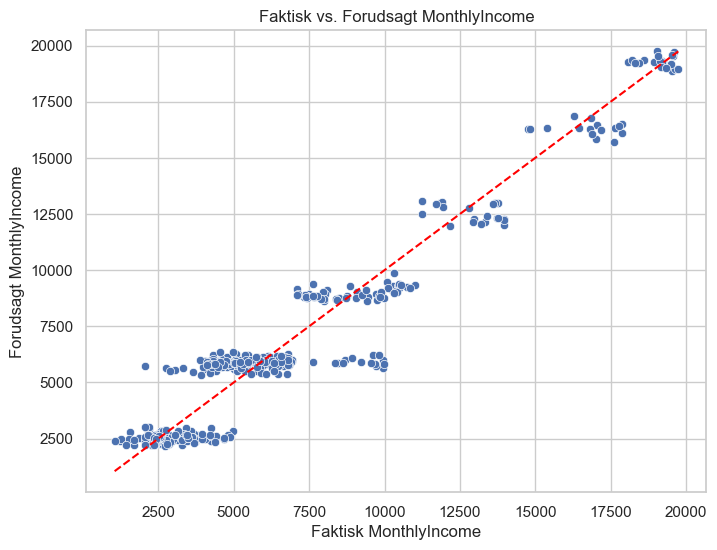

In [ ]:

# Opret en figur i passende størrelse
plt.figure(figsize=(8, 6))

# Scatter plot af faktiske vs. forudsagte lønninger
sns.scatterplot(x=y_test, y=y_pred)

# Tilføj akse-etiketter og titel
plt.xlabel("Faktisk MonthlyIncome")
plt.ylabel("Forudsagt MonthlyIncome")
plt.title("Faktisk vs. Forudsagt MonthlyIncome")

# Tilføj diagonal linje (perfekt forudsigelse)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')


# Vis grafen
plt.show()


## Visualisere fejlene (residualer)
Når vi taler om fejl i regression, kalder vi dem residualer, som er:
Fejl = Faktisk værdi −Forudsagt værdi


(Dette plot viser hvor meget modellen gætter forkert for hver observation.)

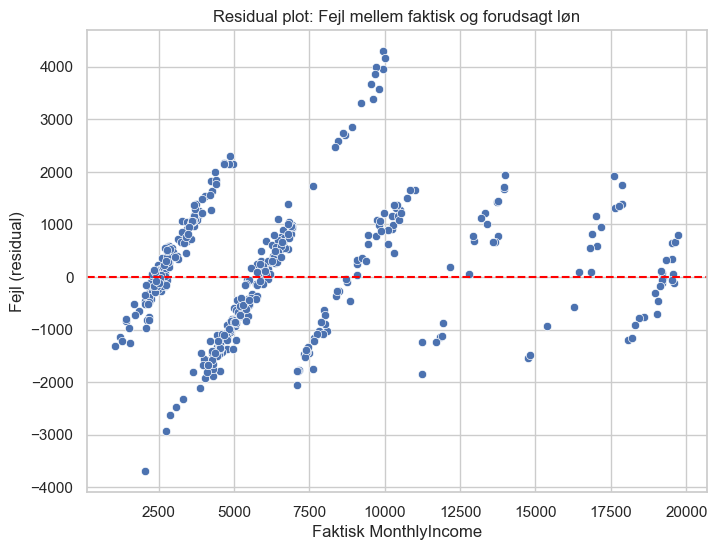

In [39]:
# Beregn residualer (fejl)
residuals = y_test - y_pred

# Lav et residual plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=residuals)

# Tilføj en vandret linje ved y=0 (nul fejl)
plt.axhline(0, color='red', linestyle='--')

# Aksetekster og titel
plt.xlabel("Faktisk MonthlyIncome")
plt.ylabel("Fejl (residual)")
plt.title("Residual plot: Fejl mellem faktisk og forudsagt løn")
plt.show()

## Det vores model gør godt: 
De fleste punkter ligger tæt på den røde linje, det bestyder at modelle gætter ret præcist for de fleste personer.


## Det vore model før mindre godt
Vi ser enkelte residualer over +4000 kr eller under –3000 kr
- enkelte medarbejdere, som modellen ikke rammer godt.